In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('clean_data.csv')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]

        # the centers (mean vector) for each cluster
        self.centroids = []


    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimize clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx


    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [ ]:
np.random.seed(42)

from sklearn.decomposition import PCA

X = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults']].values
print(X.shape)

# clusters = len(np.unique(y))
# print(clusters)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

k = KMeans(K=3, max_iters=150, plot_steps=True)
y_pred = k.predict(X_reduced)

k.plot()

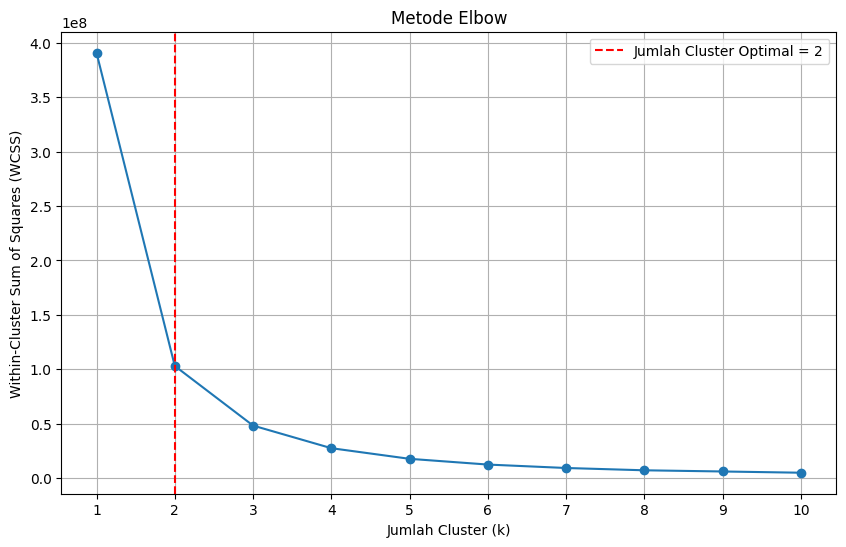

Jumlah cluster yang disarankan: 2
          lead_time  stays_in_weekend_nights  stays_in_week_nights      days  \
cluster                                                                        
0.0       37.024539                 0.896403              2.288169  3.184572   
1.0      176.245697                 1.243826              3.198457  4.442283   

           adults  children  total_of_special_requests  total_orang  
cluster                                                              
0.0      1.890427  0.119154                   0.730951     2.020027  
1.0      1.985547  0.146539                   0.762675     2.142236  


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi-fungsi sebelumnya untuk KMeans
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps
        self.clusters = [[] for _ in range(self.K)]
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # Inisialisasi centroid secara acak
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimasi cluster
        for _ in range(self.max_iters):
            # Buat cluster
            self.clusters = self._create_clusters(self.centroids)

            # Hitung centroid baru
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # Cek konvergensi
            if self._is_converged(centroids_old, self.centroids):
                break

        # Dapatkan label cluster
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

    def calculate_wcss(self):
        # Hitung Within-Cluster Sum of Squares (WCSS)
        wcss = 0
        for cluster_idx, cluster in enumerate(self.clusters):
            centroid = self.centroids[cluster_idx]
            for sample_idx in cluster:
                sample = self.X[sample_idx]
                wcss += euclidean_distance(sample, centroid)**2
        return wcss

def run_elbow_method(X, max_clusters=10):
    """
    Jalankan metode elbow untuk menentukan jumlah cluster optimal
    """
    # Simpan nilai WCSS
    wcss_values = []
    
    # Coba berbagai jumlah cluster
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(K=k)
        kmeans.predict(X)
        wcss = kmeans.calculate_wcss()
        wcss_values.append(wcss)
    
    # Plot kurva elbow
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss_values, marker='o')
    plt.title('Metode Elbow')
    plt.xlabel('Jumlah Cluster (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    
    # Cari titik "elbow" (dengan heuristik sederhana)
    diffs = np.diff(wcss_values)
    optimal_k = np.argmin(diffs) + 2  # +2 karena indeks 0 dan first derivative
    
    plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Jumlah Cluster Optimal = {optimal_k}')
    plt.legend()
    plt.show()
    
    return wcss_values, optimal_k

# Persiapan data
# Pastikan Anda sudah memiliki DataFrame 'df' dengan kolom yang diperlukan
# Contoh: df = pd.read_csv('your_data.csv')

# Pilih fitur untuk clustering
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'days', 'adults', 'children', 'total_of_special_requests', 'total_orang']

# Ambil fitur dari DataFrame
X = df[features].values

# Jalankan metode elbow
wcss, optimal_k = run_elbow_method(X, max_clusters=10)
print(f"Jumlah cluster yang disarankan: {optimal_k}")

# Gunakan jumlah cluster optimal untuk K-means
kmeans_optimal = KMeans(K=optimal_k, plot_steps=True)
y_pred = kmeans_optimal.predict(X)

# Tambahkan label cluster ke DataFrame asli
df['cluster'] = kmeans_optimal._get_cluster_labels(kmeans_optimal.clusters)

# Tampilkan ringkasan cluster
print(df.groupby('cluster').agg({
    'lead_time': 'mean',
    'stays_in_weekend_nights': 'mean',
    'stays_in_week_nights': 'mean',
    'days': 'mean',
    'adults': 'mean',
    'children': 'mean',
    'total_of_special_requests': 'mean',
    'total_orang': 'mean',
}))